# **Introduction to Regression in Machine Learning**

**> Here is a quick reminder to what we have seen in previous sessions :**

![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*hQseRDVLXt2piN_1dfz5pA.jpeg)

**Regression** is a type of **supervised learning** where the goal is to **predict** **a continuous value**, such as predicting the price of a house or the weight of an object based on its features.

# **What is Regression?**

The primary objective of **regression** is the study of
**dependence relationships ( correlation )** between two **quantitative** variables X and Y, measured on the same individuals.

**Examples:**

> Different phenomena measured in the same individuals:
> weight and height​.

> Successive measurements of the same phenomenon:
> blood pressure in the morning and evening.

🡪 Are they independent? in a linear relationship or not?

In this notebook, we will explore the following regression algorithms:

1. Linear Regression
2. Decision Tree Regressor
3. Support Vector Regressor (SVR)

# **Dataset Overview**

For this exercise, we will use **the California Housing dataset**, which contains data on housing prices and several related features.

Let's start by loading the dataset and splitting it into training and testing sets.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load the California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the dataset
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# **Data Standardization**

Just like in classification, some regression algorithms perform better when the features are standardized, especially **KNN** and **SVR**.

In [2]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **1. Linear Regression**

**Linear Regression** is one of the **simplest** and most widely used algorithms in machine learning. It models the relationship between the dependent variable and one or more independent variables by fitting a straight line.

![](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F62413fa0-3d80-411c-af93-ebd0f096a26a_1042x644.png)

In [3]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.2f}")

Linear Regression MSE: 0.56


# **Linear Regression Summary**

Linear Regression is easy to interpret and works well for datasets where the relationship between the features and the target is linear. However, it may underperform for more complex relationships.

# **2. Decision Tree Regressor**

**Decision Tree models** can be applied to all data containing numerical and categorical features. Decision trees are good at capturing the non-linear interaction between the features and the target variable. Decision trees somewhat match human-level thinking, so understanding the data is very intuitive.

![](https://editor.analyticsvidhya.com/uploads/52036dt.jpg)

> For example, if we classify how many hours a kid plays in particular weather, the decision tree looks somewhat like this above in the image.

**=> So, in short, a decision tree is a tree where each node represents a feature, each branch represents a decision, and each leaf represents an outcome(numerical value regression).**

In [4]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_regressor = DecisionTreeRegressor()

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Regressor MSE: {mse_dt:.2f}")

Decision Tree Regressor MSE: 0.50


# **Decision Tree Regressor Summary**
Decision Trees are flexible and can capture complex relationships in the data. However, they can easily overfit, so it's important to tune hyperparameters like max_depth to control this.

# **3. Support Vector Regressor (SVR)**

**Support Vector Regressor (SVR)** is an extension of Support Vector Machines (SVM) for regression tasks. SVR tries to find a hyperplane that best fits the data while ignoring small errors.

![](https://editor.analyticsvidhya.com/uploads/14173svr.png)

> In the figure above, the Blue line is the hyperplane; the Red Line is the Boundary Line.

All the data points are within the boundary line(Red Line). SVR’s main objective is to consider only those points within the boundary line.

In [5]:
# Import Support Vector Regressor
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR()

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"SVR MSE: {mse_svr:.2f}")

SVR MSE: 0.36


# **SVR Summary**
**SVR** is effective for small to medium-sized datasets and can capture non-linear relationships. It can be computationally intensive for large datasets.

# **Comparison of Models**

Let's compare the performance of all the regression models using **Mean Squared Error (MSE)**. A lower MSE indicates a better model.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


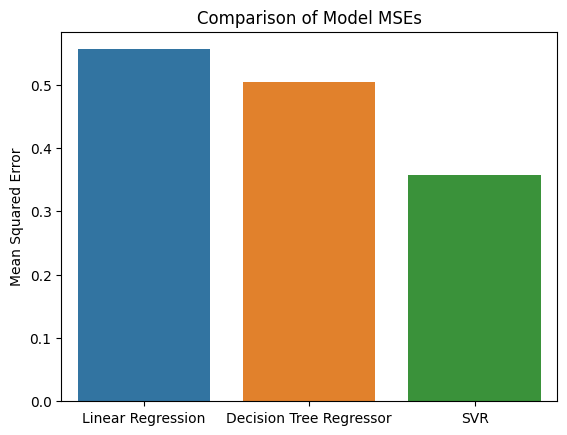

In [6]:
# Create a dictionary of model MSEs
model_mse = {
    "Linear Regression": mse_lr,
    "Decision Tree Regressor": mse_dt,
    "SVR": mse_svr
}

# Plot the MSEs
sns.barplot(x=list(model_mse.keys()), y=list(model_mse.values()))
plt.title("Comparison of Model MSEs")
plt.ylabel("Mean Squared Error")
plt.show()


# **Conclusion**
In this notebook, we introduced regression in machine learning and applied four different algorithms**—Linear Regression, Decision Tree Regressor, and SVR—**on the same dataset.

Each model has its strengths and weaknesses, and the choice of the best model depends on the specific dataset and the nature of the problem:

* **Linear Regression** is suitable for simple linear relationships.
* **Decision Trees** can capture complex relationships but may overfit.
* **SVR** is powerful but may require careful tuning of parameters.